In [1]:
import os
import numpy as np
from nilearn import image, plotting
import nibabel as nb
from functions import extract_samples, convert_samples_to_features, edit_events_full

In [2]:
data_root = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2'
derivatives_dir = os.path.join(data_root, 'derivatives')

fmriprep_dir =         os.path.join(derivatives_dir, 'fmriprep23') # fmriprep output
func_dir =             os.path.join(derivatives_dir, 'func_clean') # cleaned bold images
stab_mask_dir =        os.path.join(derivatives_dir, 'mvpa_08_stability_bold', 'stab_full_masks')    # for stability masks
output_feat_full_dir = os.path.join(derivatives_dir, 'mvpa_08_stability_bold', 'features_full') # for full features

In [3]:
subject = '01'

In [4]:
stab_mask_data = np.load(os.path.join(stab_mask_dir, f'sub-{subject}_STAB.npy'))
example_func = nb.load(os.path.join(func_dir,f'sub-{subject}_ses-01_task-02a_run-1_cleaned.nii.gz'))

# generate image
stab_mask_img = nb.Nifti1Image(stab_mask_data, example_func.affine, example_func.header)

# threshold the stability map
thres = 0.15
stab_mask_img_thres = image.threshold_img(stab_mask_img, threshold=thres)
stab_mask_img_thres_bin = image.binarize_img(stab_mask_img_thres)

/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/_utils/helpers.py:253: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  warnings.warn(
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/image.py:1168: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(niimg, result, niimg.affine, copy_header=True)


/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/opt/anaconda3/envs/brainplayback_task02/lib/python3.11/site-packages/nilearn/image/resampling.py:793: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0. 
Use 'force_resample=True' to suppress this warning.
  force_resample = _check_force_resample(force_resample)



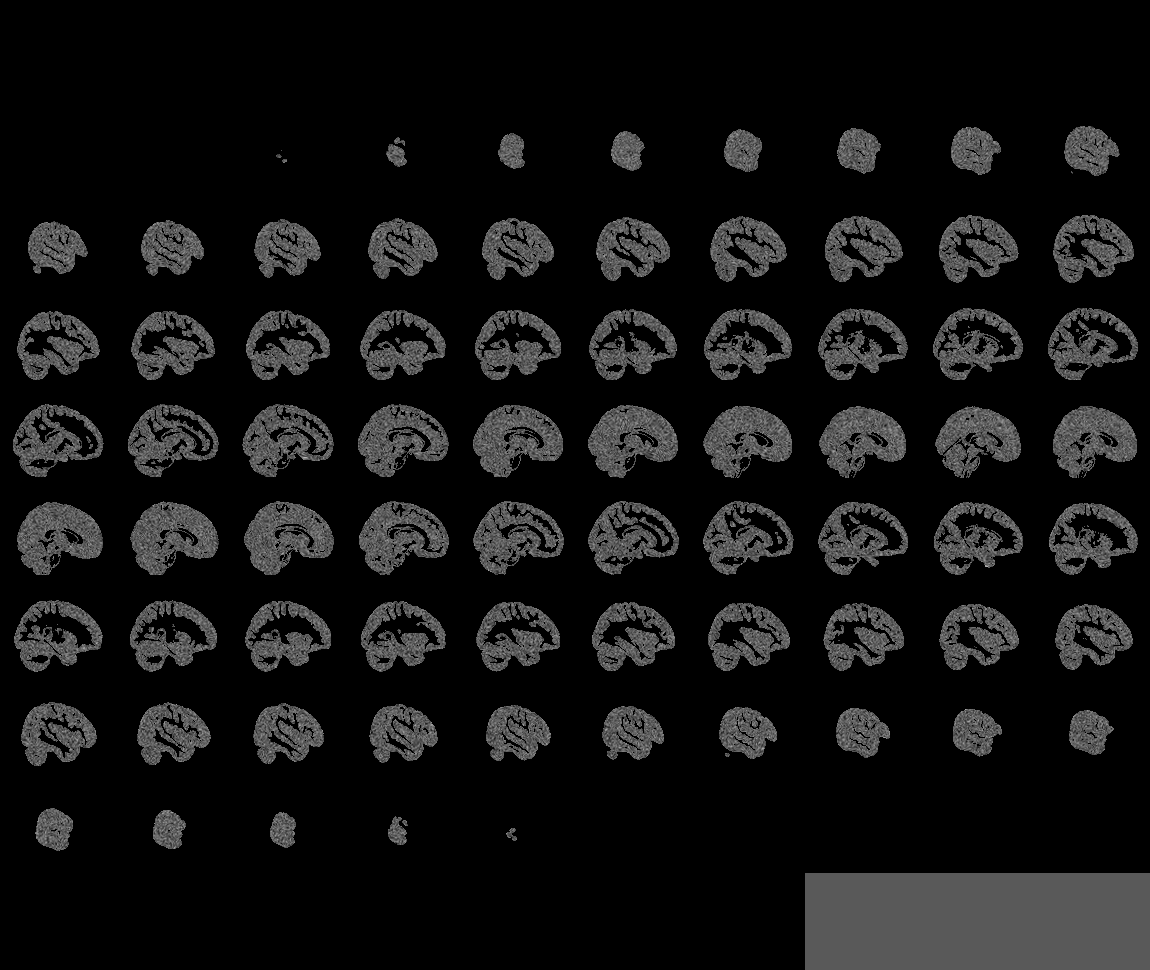
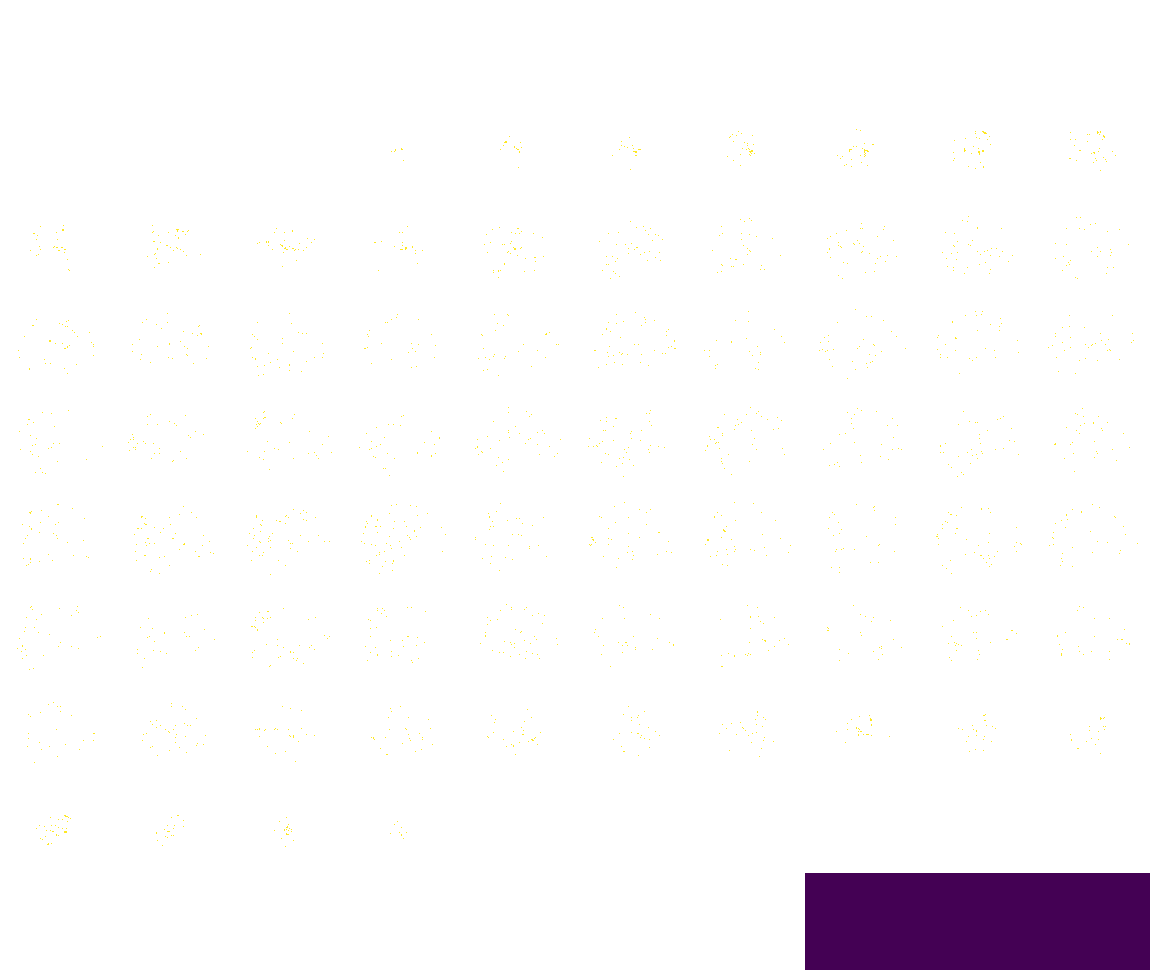

In [5]:
plotting.view_img(stab_mask_img_thres_bin, title=f'stability mask for subject {subject}', 
                  colorbar=True, cmap='viridis', symmetric_cmap=False,
                  bg_img=example_func.slicer[...,0])

In [62]:
# save stability mask
# stab_mask_img_thres.to_filename()

In [63]:
for run in ['1','2','3','4']:

    # load cleaned image
    img_clean = nb.load(os.path.join(func_dir, f'sub-{subject}_ses-01_task-02a_run-{run}_cleaned.nii.gz'))

    # extract samples from the cleaned inside the stability mask
    samples = extract_samples(img_clean, stab_mask_img_thres_bin, subject, run)

    # load and edit the events for classification
    events_split_2 = edit_events_full(data_root, subject, run)
    
    # convert samples to features
    convert_samples_to_features(samples, output_feat_full_dir, events_split_2, subject, run) 

Extracting samples for subject 19, run 1...
Samples extracted for subject 19, run 1.
Editing events for subject 19, run 1...
Events edited for subject 19, run 1.
Converting samples to features for subject 19, run 1...
Features extracted and labels saved for subject 19, run 1.
Extracting samples for subject 19, run 2...
Samples extracted for subject 19, run 2.
Editing events for subject 19, run 2...
Events edited for subject 19, run 2.
Converting samples to features for subject 19, run 2...
Features extracted and labels saved for subject 19, run 2.
Extracting samples for subject 19, run 3...
Samples extracted for subject 19, run 3.
Editing events for subject 19, run 3...
Events edited for subject 19, run 3.
Converting samples to features for subject 19, run 3...
Features extracted and labels saved for subject 19, run 3.
Extracting samples for subject 19, run 4...
Samples extracted for subject 19, run 4.
Editing events for subject 19, run 4...
Events edited for subject 19, run 4.
Convert